<a href="https://colab.research.google.com/github/Sambhav1207/Deep-Learning-Projects/blob/main/Fashion_MNIST_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST CNN Classifier

##Seeding for Reproducability


In [1]:
#Set Seeds for Reproducability
import random
random.seed(42)
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

##Importing the Dependencies

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##Data Curation

In [3]:
#Load and Prepare the Fashion MNIST Dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


##Data Processing

In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
print(train_images[0].shape)

(28, 28)


In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

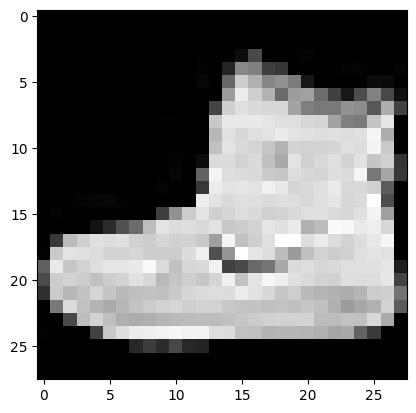

In [10]:
#Display an Image from the Dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [11]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [12]:
#Normalize Pixel Values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [13]:
#Reshape Images to specify that it's a Single Channel (Grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

##Convolutional Neural Network

In [14]:
#Build the Convolutional Base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Add Dense Layers on Top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
#Compile the Model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

##Model Training

In [16]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 20s 7ms/step - loss: 0.4919 - accuracy: 0.8197 - val_loss: 0.3582 - val_accuracy: 0.8732
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3199 - accuracy: 0.8829 - val_loss: 0.3532 - val_accuracy: 0.8702
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2747 - accuracy: 0.8988 - val_loss: 0.2926 - val_accuracy: 0.8945
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2425 - accuracy: 0.9101 - val_loss: 0.2730 - val_accuracy: 0.9001
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2195 - accuracy: 0.9188 - val_loss: 0.2690 - val_accuracy: 0.9019


##Model Evaluation

In [17]:
#Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2690 - accuracy: 0.9019 - 601ms/epoch - 2ms/step

Test accuracy: 0.9018999934196472


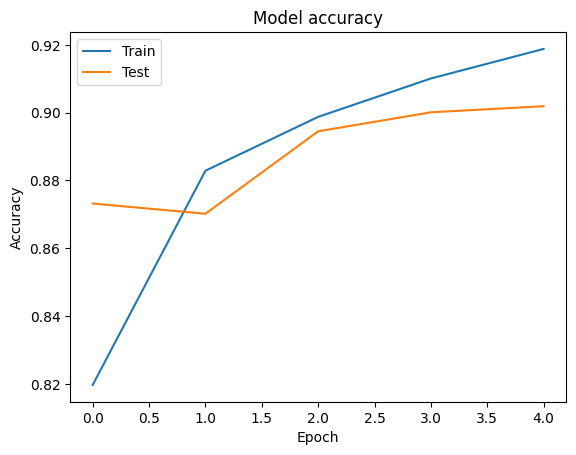

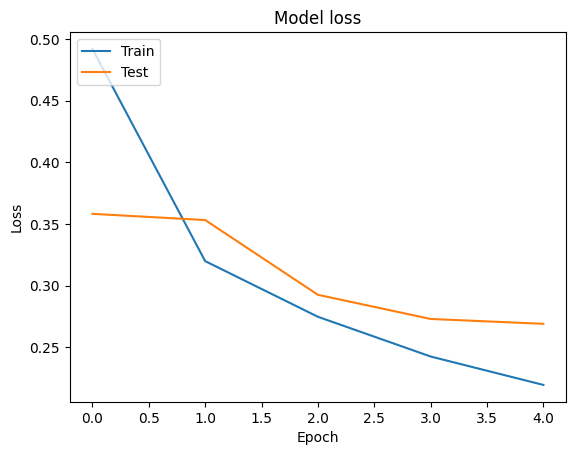

In [18]:
#Print Training and Validation Accuracy Values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Plot Training and Validation Loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
#Saving the Model
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
